# Implementing Agglomerative Hierarchical Clustering

In [1]:
#importing required modules
import numpy as np
import math

In [2]:
def complete_linkage(data,a,b):   #This function returns the complete linkage distance between two clusters, passed as array of datapoints
    dist = []
    for i in a:
        for j in b:
            d1 = data[i]
            d2 = data[j]
            dist.append(np.sqrt(np.sum(np.square(d1-d2))))
    return max(dist)

def single_linkage(data,a,b):     #This function returns the single linkage distance between two clusters, passed as array of datapoints
    dist = []
    for i in a:
        for j in b:
            d1 = data[i]
            d2 = data[j]
            dist.append(np.sqrt(np.sum(np.square(d1-d2))))
    return min(dist)


def average_linkage(data,a,b):    #This function returns the average linkage distance between two clusters, passed as array of datapoints
    dist = []
    for i in a:
        for j in b:
            d1 = data[i]
            d2 = data[j]
            dist.append(np.sqrt(np.sum(np.square(d1-d2))))
    n = np.size(dist)        
    return np.sum(dist,axis=None)/n

def centroid_linkage(data,a,b):    #This function returns the centroid linkage distance between two clusters, passed as array of datapoints
    dist = []
    centroid_a = np.mean(data[a],axis=0)
    centroid_b = np.mean(data[b],axis=0)
    dist = np.sqrt(np.sum(np.square(centroid_a-centroid_b)))
    return dist
    
def clustering(data,objs,linkage): #This function returns the nearest nodes and the height of the node to be formed by clustring them
    dist = math.inf
    for i in np.arange(len(objs)-1):
        j = i +1
        while j < len(objs) :
            a = objs[i].observations
            b = objs[j].observations
            if linkage == "complete":
                d = complete_linkage(data,a,b)
            if linkage == "single":
                d = single_linkage(data,a,b)
            if linkage == "average":
                d = average_linkage(data,a,b)
            if linkage == "centroid":
                d = centroid_linkage(data,a,b)    
                
            if d < dist:
                dist = d
                p1 = objs[i]
                p2 = objs[j]        
            j = j+1
    return [p1,p2,dist]


class dendogram:                                    #Class representing each node of dendogram
    def __init__(self,data,leaf,height,left,right):
            self.leaf = leaf
            self.height = height
            self.observations = data 
            self.L = left
            self.R = right



In [3]:
#Function to build the dendogram
def build_ahc(data,linkage):
    ahc = []
    current_clustering = []
    clusters = len(data)
    while clusters >= 1:
        if clusters == len(data):
            # Creating one leaf node with height 0 for each datapoint
            for i in np.arange(clusters):
                ahc.append(dendogram(np.array([i]),True,0,None,None))  #Storing the nodes in the datstructure
            current_clustering = np.copy(ahc)
        else:
            #clustering to form nodes till top node is obtained 
            L,R,height = clustering(data,current_clustering,linkage)    #Obtaining the nearest nodes based on linkage and height of cluster node to be formed
            observations = np.concatenate([L.observations, R.observations])   #Concating the observations of both node to form observations of the new cluster node
            ahc.append(dendogram(observations,False,height,L,R))       #Generating the new clustered node and Storing the nodes in the datastructure
            current_clustering = current_clustering[(current_clustering != L) & (current_clustering != R)] #Creating a temporary datastructure containing only the cluster nodes and unclustered nodes, no child node included
            new_node = np.copy(ahc[-1])  
            current_clustering = np.append(current_clustering,new_node) #appending the temporary datastructure with the newly formed node            
        clusters = clusters -1        
    #print(ahc)
    return ahc

In [4]:
#Function to get the required number of clusters and the observations which are part of them
def getClusters(tree,k):
    n = len(tree)
    cluster = 0
    clusters = [] #dataset to hold the objects representing the required clusters
    #For single cluster the topmost node is returned
    if k ==1 :
        print("Cluster 1 : Number of observations:", len(tree[-1].observations))
        print("       Observations",data[tree[-1].observations] )
        cluster = cluster + 1
    #For any value higher tha 1 itertaive splitting is done on the highest node till the required number of clusters are obtained    
    else:
        a = tree[-1].L
        b = tree[-1].R
        clusters.append(a)
        clusters.append(b)
        cluster = 2
        while cluster < k :
            highest = 0
            highest_node = 0
            for i in np.arange(len(clusters)):   #Checking for node with greatest height to record and split
                if clusters[i].height > highest:
                    highest = clusters[i].height
                    highest_node =i
                    node = clusters[i]
            clusters.pop(highest_node)
            clusters.append(node.L)
            clusters.append(node.R)
            cluster = cluster + 1
    
    #printing the clusters and calulation potential function value
    potential = 0
    for i in range(0,len(clusters)):
        print("Cluster ",i+1,": Number of observations: ", len(clusters[i].observations)) #Clsuetr number and number of observations which are part of the cluster
        print("Observation Indices:", clusters[i].observations )  #Provides the indices of the datapoints which are part of the cluster
        #print("Observations:", data[clusters[i].observations] )  #you may uncomment this line to obtain actual datapoints which are part of the cluster
        print()
        cluster_centroid = np.mean( data[clusters[i].observations],axis=0)  #Calculating centroid for the cluster
        distance_to_centroid = np.sum(np.sum(np.square(data[clusters[i].observations] - cluster_centroid),axis=1)) #Calculating sum of the distances from each point of the clsuter to centroid of the cluster
        potential = potential + distance_to_centroid  #Adding the distance value for each cluster to the potential value
        
    print("Value of Potential Function:",potential)   
        
        
    return potential   

# Loading ncidata

In [5]:
ncidata = np.genfromtxt("ncidata.txt")
data = np.transpose(ncidata)
np.shape(data)

(64, 6830)

# Building Dendogram using the ncidata and performance comparision

Using Complete Linkage

In [6]:
tree_complete = build_ahc(data,"complete") # building AHC with complete linkage
getClusters(tree_complete,5)     #Retreiving 5 clusters from the AHC 

Cluster  1 : Number of observations:  3
Observation Indices: [9 3 4]

Cluster  2 : Number of observations:  11
Observation Indices: [51 48 49 50 42 41 43 44 45 46 47]

Cluster  3 : Number of observations:  8
Observation Indices: [38 39 40 36 34 35 33 37]

Cluster  4 : Number of observations:  2
Observation Indices: [53 54]

Cluster  5 : Number of observations:  40
Observation Indices: [55 58 59 60 61 56 57 62 63 19 20 21 17 18  0  1  6  5  7 24 25 10 11 12
 16 13 14 15 26 27 52 30 31 32 22  2  8 23 28 29]

Value of Potential Function: 207434.86760190228


207434.86760190228

Using Single Linkage

In [7]:
tree_single = build_ahc(data,"single")# building AHC with single linkage
getClusters(tree_single,5)            #Retreiving 5 clusters from the AHC 

Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  57
Observation Indices: [54 17  4 19 18 55 56 57 62 58 63 59 60 61  7  6  5 24 53 25  3 22 27 46
 20 21 51 48 49 50 47 52 42 26 28 23 32 30 31 29 44 45 41 43  8 10 16 13
 11 12 14 15  2  0  1 33 37]

Value of Potential Function: 225466.44531134836


225466.44531134836

Using Average Linkage

In [8]:
tree_average = build_ahc(data,"average")   # building AHC with average linkage
getClusters(tree_average,5)                #Retreiving 5 clusters from the AHC 

Cluster  1 : Number of observations:  54
Observation Indices: [55 56 57 62 58 63 59 60 61 19 17 18 24 25 20 21  8 22 16 13 14 15 10 11
 12 32 26 27 52 30 31 23 28 29  3  2  0  1  6  5  7 53 54 51 48 49 50 46
 47 42 41 43 44 45]

Cluster  2 : Number of observations:  1
Observation Indices: [40]

Cluster  3 : Number of observations:  7
Observation Indices: [38 39 36 34 35 33 37]

Cluster  4 : Number of observations:  1
Observation Indices: [4]

Cluster  5 : Number of observations:  1
Observation Indices: [9]

Value of Potential Function: 226030.470940475


226030.470940475

Using Centroid Linkage

In [9]:
tree_centroid = build_ahc(data,"centroid") # building AHC with centroid linkage
getClusters(tree_centroid,5)               #Retreiving 5 clusters from the AHC 

Cluster  1 : Number of observations:  2
Observation Indices: [38 39]

Cluster  2 : Number of observations:  1
Observation Indices: [40]

Cluster  3 : Number of observations:  1
Observation Indices: [4]

Cluster  4 : Number of observations:  1
Observation Indices: [46]

Cluster  5 : Number of observations:  59
Observation Indices: [54 37 36 34 35 55  9 19  3 17 42 33 47  6 24 18  5  7 25 53 52 27 20 21
 32 22 26 28 23 41 56 57 62 58 63 59 60 61  0  1 30  8  2 29 16 31 15 14
 10 13 11 12 44 43 45 51 48 49 50]

Value of Potential Function: 234709.73243226265


234709.73243226265

# Analysing change of potential function value with number of clusters for different linkages 

In [10]:
#storing the values of potential function for different number of clusters for different linkage types
p = np.zeros((63,4))
i = 0
for linkage in ["complete","single","average","centroid"]:
    print("Linkage ",linkage)
    tree = build_ahc(data,linkage)
    for k in range(1,64):
        print(k)
        p[k-1][i] = getClusters(tree,k)
    i = i + 1     


Linkage  complete
1
Value of Potential Function: 0
2
Cluster  1 : Number of observations:  19
Observation Indices: [51 48 49 50 42 41 43 44 45 46 47 38 39 40 36 34 35 33 37]

Cluster  2 : Number of observations:  45
Observation Indices: [ 9  3  4 53 54 55 58 59 60 61 56 57 62 63 19 20 21 17 18  0  1  6  5  7
 24 25 10 11 12 16 13 14 15 26 27 52 30 31 32 22  2  8 23 28 29]

Value of Potential Function: 236735.86399256525
3
Cluster  1 : Number of observations:  19
Observation Indices: [51 48 49 50 42 41 43 44 45 46 47 38 39 40 36 34 35 33 37]

Cluster  2 : Number of observations:  3
Observation Indices: [9 3 4]

Cluster  3 : Number of observations:  42
Observation Indices: [53 54 55 58 59 60 61 56 57 62 63 19 20 21 17 18  0  1  6  5  7 24 25 10
 11 12 16 13 14 15 26 27 52 30 31 32 22  2  8 23 28 29]

Value of Potential Function: 229482.85682101408
4
Cluster  1 : Number of observations:  3
Observation Indices: [9 3 4]

Cluster  2 : Number of observations:  42
Observation Indices: [53 54 5

Cluster  5 : Number of observations:  1
Observation Indices: [9]

Cluster  6 : Number of observations:  2
Observation Indices: [3 4]

Cluster  7 : Number of observations:  4
Observation Indices: [51 48 49 50]

Cluster  8 : Number of observations:  7
Observation Indices: [42 41 43 44 45 46 47]

Cluster  9 : Number of observations:  2
Observation Indices: [24 25]

Cluster  10 : Number of observations:  19
Observation Indices: [10 11 12 16 13 14 15 26 27 52 30 31 32 22  2  8 23 28 29]

Cluster  11 : Number of observations:  3
Observation Indices: [19 20 21]

Cluster  12 : Number of observations:  2
Observation Indices: [17 18]

Cluster  13 : Number of observations:  5
Observation Indices: [0 1 6 5 7]

Cluster  14 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  15 : Number of observations:  2
Observation Indices: [33 37]

Value of Potential Function: 128378.14412744361
16
Cluster  1 : Number of observations:  2
Observation Indices: [53 54]

Cluster  2 : Number of obs

Cluster  4 : Number of observations:  1
Observation Indices: [9]

Cluster  5 : Number of observations:  2
Observation Indices: [3 4]

Cluster  6 : Number of observations:  4
Observation Indices: [51 48 49 50]

Cluster  7 : Number of observations:  2
Observation Indices: [24 25]

Cluster  8 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  9 : Number of observations:  2
Observation Indices: [33 37]

Cluster  10 : Number of observations:  7
Observation Indices: [10 11 12 16 13 14 15]

Cluster  11 : Number of observations:  1
Observation Indices: [19]

Cluster  12 : Number of observations:  2
Observation Indices: [20 21]

Cluster  13 : Number of observations:  2
Observation Indices: [0 1]

Cluster  14 : Number of observations:  3
Observation Indices: [6 5 7]

Cluster  15 : Number of observations:  5
Observation Indices: [26 27 52 30 31]

Cluster  16 : Number of observations:  5
Observation Indices: [42 41 43 44 45]

Cluster  17 : Number of observations:  2
Observation

Cluster  10 : Number of observations:  2
Observation Indices: [0 1]

Cluster  11 : Number of observations:  5
Observation Indices: [42 41 43 44 45]

Cluster  12 : Number of observations:  1
Observation Indices: [55]

Cluster  13 : Number of observations:  8
Observation Indices: [58 59 60 61 56 57 62 63]

Cluster  14 : Number of observations:  1
Observation Indices: [32]

Cluster  15 : Number of observations:  6
Observation Indices: [22  2  8 23 28 29]

Cluster  16 : Number of observations:  1
Observation Indices: [17]

Cluster  17 : Number of observations:  1
Observation Indices: [18]

Cluster  18 : Number of observations:  1
Observation Indices: [33]

Cluster  19 : Number of observations:  1
Observation Indices: [37]

Cluster  20 : Number of observations:  1
Observation Indices: [46]

Cluster  21 : Number of observations:  1
Observation Indices: [47]

Cluster  22 : Number of observations:  1
Observation Indices: [53]

Cluster  23 : Number of observations:  1
Observation Indices: [54]


Cluster  8 : Number of observations:  2
Observation Indices: [20 21]

Cluster  9 : Number of observations:  2
Observation Indices: [0 1]

Cluster  10 : Number of observations:  1
Observation Indices: [55]

Cluster  11 : Number of observations:  1
Observation Indices: [32]

Cluster  12 : Number of observations:  1
Observation Indices: [17]

Cluster  13 : Number of observations:  1
Observation Indices: [18]

Cluster  14 : Number of observations:  1
Observation Indices: [33]

Cluster  15 : Number of observations:  1
Observation Indices: [37]

Cluster  16 : Number of observations:  1
Observation Indices: [46]

Cluster  17 : Number of observations:  1
Observation Indices: [47]

Cluster  18 : Number of observations:  1
Observation Indices: [53]

Cluster  19 : Number of observations:  1
Observation Indices: [54]

Cluster  20 : Number of observations:  1
Observation Indices: [6]

Cluster  21 : Number of observations:  1
Observation Indices: [3]

Cluster  22 : Number of observations:  1
Observa

Observation Indices: [6]

Cluster  19 : Number of observations:  1
Observation Indices: [3]

Cluster  20 : Number of observations:  1
Observation Indices: [4]

Cluster  21 : Number of observations:  2
Observation Indices: [26 27]

Cluster  22 : Number of observations:  3
Observation Indices: [10 11 12]

Cluster  23 : Number of observations:  4
Observation Indices: [16 13 14 15]

Cluster  24 : Number of observations:  4
Observation Indices: [58 59 60 61]

Cluster  25 : Number of observations:  4
Observation Indices: [56 57 62 63]

Cluster  26 : Number of observations:  1
Observation Indices: [5]

Cluster  27 : Number of observations:  1
Observation Indices: [7]

Cluster  28 : Number of observations:  1
Observation Indices: [22]

Cluster  29 : Number of observations:  1
Observation Indices: [42]

Cluster  30 : Number of observations:  4
Observation Indices: [41 43 44 45]

Cluster  31 : Number of observations:  1
Observation Indices: [51]

Cluster  32 : Number of observations:  3
Observat

Cluster  18 : Number of observations:  1
Observation Indices: [6]

Cluster  19 : Number of observations:  1
Observation Indices: [3]

Cluster  20 : Number of observations:  1
Observation Indices: [4]

Cluster  21 : Number of observations:  3
Observation Indices: [10 11 12]

Cluster  22 : Number of observations:  4
Observation Indices: [58 59 60 61]

Cluster  23 : Number of observations:  1
Observation Indices: [5]

Cluster  24 : Number of observations:  1
Observation Indices: [7]

Cluster  25 : Number of observations:  1
Observation Indices: [22]

Cluster  26 : Number of observations:  1
Observation Indices: [42]

Cluster  27 : Number of observations:  4
Observation Indices: [41 43 44 45]

Cluster  28 : Number of observations:  1
Observation Indices: [51]

Cluster  29 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  30 : Number of observations:  2
Observation Indices: [2 8]

Cluster  31 : Number of observations:  1
Observation Indices: [52]

Cluster  32 : Number o

Cluster  8 : Number of observations:  1
Observation Indices: [55]

Cluster  9 : Number of observations:  1
Observation Indices: [32]

Cluster  10 : Number of observations:  1
Observation Indices: [17]

Cluster  11 : Number of observations:  1
Observation Indices: [18]

Cluster  12 : Number of observations:  1
Observation Indices: [33]

Cluster  13 : Number of observations:  1
Observation Indices: [37]

Cluster  14 : Number of observations:  1
Observation Indices: [46]

Cluster  15 : Number of observations:  1
Observation Indices: [47]

Cluster  16 : Number of observations:  1
Observation Indices: [53]

Cluster  17 : Number of observations:  1
Observation Indices: [54]

Cluster  18 : Number of observations:  1
Observation Indices: [6]

Cluster  19 : Number of observations:  1
Observation Indices: [3]

Cluster  20 : Number of observations:  1
Observation Indices: [4]

Cluster  21 : Number of observations:  4
Observation Indices: [58 59 60 61]

Cluster  22 : Number of observations:  1
Obs


Cluster  22 : Number of observations:  1
Observation Indices: [7]

Cluster  23 : Number of observations:  1
Observation Indices: [22]

Cluster  24 : Number of observations:  1
Observation Indices: [42]

Cluster  25 : Number of observations:  1
Observation Indices: [51]

Cluster  26 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  27 : Number of observations:  1
Observation Indices: [52]

Cluster  28 : Number of observations:  2
Observation Indices: [30 31]

Cluster  29 : Number of observations:  1
Observation Indices: [24]

Cluster  30 : Number of observations:  1
Observation Indices: [25]

Cluster  31 : Number of observations:  1
Observation Indices: [16]

Cluster  32 : Number of observations:  3
Observation Indices: [13 14 15]

Cluster  33 : Number of observations:  2
Observation Indices: [56 57]

Cluster  34 : Number of observations:  1
Observation Indices: [26]

Cluster  35 : Number of observations:  1
Observation Indices: [27]

Cluster  36 : Number of observ

Cluster  47 : Number of observations:  2
Observation Indices: [60 61]

Cluster  48 : Number of observations:  1
Observation Indices: [44]

Cluster  49 : Number of observations:  1
Observation Indices: [45]

Cluster  50 : Number of observations:  1
Observation Indices: [13]

Cluster  51 : Number of observations:  1
Observation Indices: [14]

Cluster  52 : Number of observations:  1
Observation Indices: [15]

Value of Potential Function: 15679.50605075074
53
Cluster  1 : Number of observations:  2
Observation Indices: [38 39]

Cluster  2 : Number of observations:  1
Observation Indices: [40]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  5 : Number of observations:  1
Observation Indices: [19]

Cluster  6 : Number of observations:  2
Observation Indices: [20 21]

Cluster  7 : Number of observations:  2
Observation Indices: [0 1]

Cluster  8 : Number of observations:  1
Observation Indice

Cluster  44 : Number of observations:  2
Observation Indices: [60 61]

Cluster  45 : Number of observations:  1
Observation Indices: [44]

Cluster  46 : Number of observations:  1
Observation Indices: [45]

Cluster  47 : Number of observations:  1
Observation Indices: [13]

Cluster  48 : Number of observations:  1
Observation Indices: [14]

Cluster  49 : Number of observations:  1
Observation Indices: [15]

Cluster  50 : Number of observations:  1
Observation Indices: [30]

Cluster  51 : Number of observations:  1
Observation Indices: [31]

Cluster  52 : Number of observations:  1
Observation Indices: [38]

Cluster  53 : Number of observations:  1
Observation Indices: [39]

Cluster  54 : Number of observations:  1
Observation Indices: [41]

Cluster  55 : Number of observations:  1
Observation Indices: [43]

Value of Potential Function: 10055.538423796725
56
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9

Cluster  34 : Number of observations:  1
Observation Indices: [63]

Cluster  35 : Number of observations:  1
Observation Indices: [2]

Cluster  36 : Number of observations:  1
Observation Indices: [8]

Cluster  37 : Number of observations:  1
Observation Indices: [10]

Cluster  38 : Number of observations:  1
Observation Indices: [58]

Cluster  39 : Number of observations:  1
Observation Indices: [28]

Cluster  40 : Number of observations:  1
Observation Indices: [29]

Cluster  41 : Number of observations:  1
Observation Indices: [59]

Cluster  42 : Number of observations:  1
Observation Indices: [44]

Cluster  43 : Number of observations:  1
Observation Indices: [45]

Cluster  44 : Number of observations:  1
Observation Indices: [13]

Cluster  45 : Number of observations:  1
Observation Indices: [14]

Cluster  46 : Number of observations:  1
Observation Indices: [15]

Cluster  47 : Number of observations:  1
Observation Indices: [30]

Cluster  48 : Number of observations:  1
Observati

Cluster  14 : Number of observations:  1
Observation Indices: [6]

Cluster  15 : Number of observations:  1
Observation Indices: [3]

Cluster  16 : Number of observations:  1
Observation Indices: [4]

Cluster  17 : Number of observations:  1
Observation Indices: [5]

Cluster  18 : Number of observations:  1
Observation Indices: [7]

Cluster  19 : Number of observations:  1
Observation Indices: [22]

Cluster  20 : Number of observations:  1
Observation Indices: [42]

Cluster  21 : Number of observations:  1
Observation Indices: [51]

Cluster  22 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  23 : Number of observations:  1
Observation Indices: [52]

Cluster  24 : Number of observations:  1
Observation Indices: [24]

Cluster  25 : Number of observations:  1
Observation Indices: [25]

Cluster  26 : Number of observations:  1
Observation Indices: [16]

Cluster  27 : Number of observations:  2
Observation Indices: [56 57]

Cluster  28 : Number of observations:  1
Obs

Cluster  32 : Number of observations:  1
Observation Indices: [8]

Cluster  33 : Number of observations:  1
Observation Indices: [10]

Cluster  34 : Number of observations:  1
Observation Indices: [58]

Cluster  35 : Number of observations:  1
Observation Indices: [28]

Cluster  36 : Number of observations:  1
Observation Indices: [29]

Cluster  37 : Number of observations:  1
Observation Indices: [59]

Cluster  38 : Number of observations:  1
Observation Indices: [44]

Cluster  39 : Number of observations:  1
Observation Indices: [45]

Cluster  40 : Number of observations:  1
Observation Indices: [13]

Cluster  41 : Number of observations:  1
Observation Indices: [14]

Cluster  42 : Number of observations:  1
Observation Indices: [15]

Cluster  43 : Number of observations:  1
Observation Indices: [30]

Cluster  44 : Number of observations:  1
Observation Indices: [31]

Cluster  45 : Number of observations:  1
Observation Indices: [38]

Cluster  46 : Number of observations:  1
Observat

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [33]

Cluster  6 : Number of observations:  1
Observation Indices: [37]

Cluster  7 : Number of observations:  1
Observation Indices: [54]

Cluster  8 : Number of observations:  1
Observation Indices: [17]

Cluster  9 : Number of observations:  1
Observation Indices: [4]

Cluster  10 : Number of observations:  1
Observation Indices: [19]

Cluster  11 : Number of observations:  1
Observation Indices: [18]

Cluster  12 : Number of observations:  9
Observation Indices: [55 56 57 62 58 63 59 60 61]

Cluster  13 : Number of observations:  41
Observation Indices: [ 7  6  5 24 53 25  3 22 27 46 20 21 51 48 49 50 47 52 42 26 28 23 32 30
 31 29 44 45 41 43  8 10 16 13 11 12 14 15  2  0  1]

Value of Potential Function: 168285.625

Cluster  19 : Number of observations:  1
Observation Indices: [3]

Cluster  20 : Number of observations:  34
Observation Indices: [22 27 46 20 21 51 48 49 50 47 52 42 26 28 23 32 30 31 29 44 45 41 43  8
 10 16 13 11 12 14 15  2  0  1]

Value of Potential Function: 137992.31913398043
21
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [33]

Cluster  6 : Number of observations:  1
Observation Indices: [37]

Cluster  7 : Number of observations:  1
Observation Indices: [54]

Cluster  8 : Number of observations:  1
Observation Indices: [17]

Cluster  9 : Number of observations:  1
Observation Indices: [4]

Cluster  10 : Number of observations:  1
Observation Indices: [19]

Cluster  11 : Number of observation

Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [33]

Cluster  6 : Number of observations:  1
Observation Indices: [37]

Cluster  7 : Number of observations:  1
Observation Indices: [54]

Cluster  8 : Number of observations:  1
Observation Indices: [17]

Cluster  9 : Number of observations:  1
Observation Indices: [4]

Cluster  10 : Number of observations:  1
Observation Indices: [19]

Cluster  11 : Number of observations:  1
Observation Indices: [18]

Cluster  12 : Number of observations:  9
Observation Indices: [55 56 57 62 58 63 59 60 61]

Cluster  13 : Number of observations:  1
Observation Indices: [7]

Cluster  14 : Number of observations:  1
Observation Indices: [6]

Cluster  15 : Number of obse

Value of Potential Function: 78955.89721505519
32
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [33]

Cluster  6 : Number of observations:  1
Observation Indices: [37]

Cluster  7 : Number of observations:  1
Observation Indices: [54]

Cluster  8 : Number of observations:  1
Observation Indices: [17]

Cluster  9 : Number of observations:  1
Observation Indices: [4]

Cluster  10 : Number of observations:  1
Observation Indices: [19]

Cluster  11 : Number of observations:  1
Observation Indices: [18]

Cluster  12 : Number of observations:  1
Observation Indices: [7]

Cluster  13 : Number of observations:  1
Observation Indices: [6]

Cluster  14 : Number of observations:  1
Observation Indices: [5]

Clu

Cluster  17 : Number of observations:  1
Observation Indices: [25]

Cluster  18 : Number of observations:  1
Observation Indices: [3]

Cluster  19 : Number of observations:  1
Observation Indices: [22]

Cluster  20 : Number of observations:  1
Observation Indices: [27]

Cluster  21 : Number of observations:  1
Observation Indices: [46]

Cluster  22 : Number of observations:  2
Observation Indices: [20 21]

Cluster  23 : Number of observations:  1
Observation Indices: [47]

Cluster  24 : Number of observations:  1
Observation Indices: [52]

Cluster  25 : Number of observations:  1
Observation Indices: [55]

Cluster  26 : Number of observations:  1
Observation Indices: [51]

Cluster  27 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  28 : Number of observations:  1
Observation Indices: [42]

Cluster  29 : Number of observations:  2
Observation Indices: [56 57]

Cluster  30 : Number of observations:  1
Observation Indices: [62]

Cluster  31 : Number of observations:

Cluster  25 : Number of observations:  1
Observation Indices: [55]

Cluster  26 : Number of observations:  1
Observation Indices: [51]

Cluster  27 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  28 : Number of observations:  1
Observation Indices: [42]

Cluster  29 : Number of observations:  2
Observation Indices: [56 57]

Cluster  30 : Number of observations:  1
Observation Indices: [62]

Cluster  31 : Number of observations:  5
Observation Indices: [58 63 59 60 61]

Cluster  32 : Number of observations:  1
Observation Indices: [2]

Cluster  33 : Number of observations:  2
Observation Indices: [0 1]

Cluster  34 : Number of observations:  1
Observation Indices: [26]

Cluster  35 : Number of observations:  1
Observation Indices: [8]

Cluster  36 : Number of observations:  7
Observation Indices: [10 16 13 11 12 14 15]

Cluster  37 : Number of observations:  1
Observation Indices: [28]

Cluster  38 : Number of observations:  1
Observation Indices: [23]

Cluster  3

Cluster  14 : Number of observations:  1
Observation Indices: [5]

Cluster  15 : Number of observations:  1
Observation Indices: [24]

Cluster  16 : Number of observations:  1
Observation Indices: [53]

Cluster  17 : Number of observations:  1
Observation Indices: [25]

Cluster  18 : Number of observations:  1
Observation Indices: [3]

Cluster  19 : Number of observations:  1
Observation Indices: [22]

Cluster  20 : Number of observations:  1
Observation Indices: [27]

Cluster  21 : Number of observations:  1
Observation Indices: [46]

Cluster  22 : Number of observations:  2
Observation Indices: [20 21]

Cluster  23 : Number of observations:  1
Observation Indices: [47]

Cluster  24 : Number of observations:  1
Observation Indices: [52]

Cluster  25 : Number of observations:  1
Observation Indices: [55]

Cluster  26 : Number of observations:  1
Observation Indices: [51]

Cluster  27 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  28 : Number of observations:  1



Cluster  36 : Number of observations:  1
Observation Indices: [23]

Cluster  37 : Number of observations:  1
Observation Indices: [32]

Cluster  38 : Number of observations:  1
Observation Indices: [58]

Cluster  39 : Number of observations:  2
Observation Indices: [30 31]

Cluster  40 : Number of observations:  1
Observation Indices: [63]

Cluster  41 : Number of observations:  3
Observation Indices: [59 60 61]

Cluster  42 : Number of observations:  1
Observation Indices: [10]

Cluster  43 : Number of observations:  1
Observation Indices: [29]

Cluster  44 : Number of observations:  1
Observation Indices: [44]

Cluster  45 : Number of observations:  3
Observation Indices: [45 41 43]

Cluster  46 : Number of observations:  4
Observation Indices: [16 13 11 12]

Cluster  47 : Number of observations:  2
Observation Indices: [14 15]

Value of Potential Function: 26401.57894982516
48
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1

Cluster  46 : Number of observations:  1
Observation Indices: [15]

Cluster  47 : Number of observations:  1
Observation Indices: [45]

Cluster  48 : Number of observations:  2
Observation Indices: [41 43]

Cluster  49 : Number of observations:  1
Observation Indices: [30]

Cluster  50 : Number of observations:  1
Observation Indices: [31]

Value of Potential Function: 20425.152318052504
51
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  1
Observation Indices: [33]

Cluster  5 : Number of observations:  1
Observation Indices: [37]

Cluster  6 : Number of observations:  1
Observation Indices: [54]

Cluster  7 : Number of observations:  1
Observation Indices: [17]

Cluster  8 : Number of observations:  1
Observation Indices: [4]

Cluster  9 : Number of observations:  1
Observation Indices: [19]


Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  1
Observation Indices: [33]

Cluster  5 : Number of observations:  1
Observation Indices: [37]

Cluster  6 : Number of observations:  1
Observation Indices: [54]

Cluster  7 : Number of observations:  1
Observation Indices: [17]

Cluster  8 : Number of observations:  1
Observation Indices: [4]

Cluster  9 : Number of observations:  1
Observation Indices: [19]

Cluster  10 : Number of observations:  1
Observation Indices: [18]

Cluster  11 : Number of observations:  1
Observation Indices: [7]

Cluster  12 : Number of observations:  1
Observation Indices: [6]

Cluster  13 : Number of observations:  1
Observation Indices: [5]

Cluster  14 : Number of observations:  1
Observation Indices: [24]

Cluster  15 : Number of observations:  1
Observation Indices: [53]

Cluster  16 : Number of obse

Cluster  48 : Number of observations:  1
Observation Indices: [39]

Cluster  49 : Number of observations:  1
Observation Indices: [16]

Cluster  50 : Number of observations:  1
Observation Indices: [41]

Cluster  51 : Number of observations:  1
Observation Indices: [43]

Cluster  52 : Number of observations:  1
Observation Indices: [13]

Cluster  53 : Number of observations:  1
Observation Indices: [11]

Cluster  54 : Number of observations:  1
Observation Indices: [12]

Cluster  55 : Number of observations:  1
Observation Indices: [59]

Cluster  56 : Number of observations:  2
Observation Indices: [60 61]

Value of Potential Function: 8378.33370119427
57
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [9]

Cluster  3 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  4 : Number of observations:  1
Observation Indices: [33]

Cluster  5 : Number of observations:  1
Observation Indices: [3

Cluster  41 : Number of observations:  1
Observation Indices: [15]

Cluster  42 : Number of observations:  1
Observation Indices: [45]

Cluster  43 : Number of observations:  1
Observation Indices: [30]

Cluster  44 : Number of observations:  1
Observation Indices: [31]

Cluster  45 : Number of observations:  1
Observation Indices: [38]

Cluster  46 : Number of observations:  1
Observation Indices: [39]

Cluster  47 : Number of observations:  1
Observation Indices: [16]

Cluster  48 : Number of observations:  1
Observation Indices: [41]

Cluster  49 : Number of observations:  1
Observation Indices: [43]

Cluster  50 : Number of observations:  1
Observation Indices: [13]

Cluster  51 : Number of observations:  1
Observation Indices: [11]

Cluster  52 : Number of observations:  1
Observation Indices: [12]

Cluster  53 : Number of observations:  1
Observation Indices: [59]

Cluster  54 : Number of observations:  1
Observation Indices: [60]

Cluster  55 : Number of observations:  1
Observa

Observation Indices: [46]

Cluster  20 : Number of observations:  1
Observation Indices: [47]

Cluster  21 : Number of observations:  1
Observation Indices: [52]

Cluster  22 : Number of observations:  1
Observation Indices: [55]

Cluster  23 : Number of observations:  1
Observation Indices: [51]

Cluster  24 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  25 : Number of observations:  1
Observation Indices: [42]

Cluster  26 : Number of observations:  1
Observation Indices: [62]

Cluster  27 : Number of observations:  1
Observation Indices: [2]

Cluster  28 : Number of observations:  1
Observation Indices: [26]

Cluster  29 : Number of observations:  1
Observation Indices: [8]

Cluster  30 : Number of observations:  1
Observation Indices: [28]

Cluster  31 : Number of observations:  1
Observation Indices: [23]

Cluster  32 : Number of observations:  1
Observation Indices: [32]

Cluster  33 : Number of observations:  1
Observation Indices: [58]

Cluster  34 : Num

Cluster  5 : Number of observations:  5
Observation Indices: [36 34 35 33 37]

Cluster  6 : Number of observations:  41
Observation Indices: [55 56 57 62 58 63 59 60 61 19 17 18 24 25 20 21  8 22 16 13 14 15 10 11
 12 32 26 27 52 30 31 23 28 29  3  2  0  1  6  5  7]

Cluster  7 : Number of observations:  2
Observation Indices: [53 54]

Cluster  8 : Number of observations:  11
Observation Indices: [51 48 49 50 46 47 42 41 43 44 45]

Value of Potential Function: 189922.45220784712
9
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  5
Observation Indices: [36 34 35 33 37]

Cluster  6 : Number of observations:  2
Observation Indices: [53 54]

Cluster  7 : Number of observations:  11
Observation Indices: [51 48 49 50 46 47 42 41 43 44 45]

Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  2
Observation Indices: [53 54]

Cluster  6 : Number of observations:  9
Observation Indices: [55 56 57 62 58 63 59 60 61]

Cluster  7 : Number of observations:  1
Observation Indices: [19]

Cluster  8 : Number of observations:  2
Observation Indices: [24 25]

Cluster  9 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  10 : Number of observations:  4
Observation Indices: [51 48 49 50]

Cluster  11 : Number of observations:  7
Observation Indices: [46 47 42 41 43 44 45]

Cluster  12 : Number of observations:  20
Observation Indices: [20 21  8 22 16 13 14 15 10 11 12 32 26 27 52 30 31 23 28 29]

Cluster  13 : Number of observations:  1
Observation Indices: [17]

Cluster  14 : Number of observations:  1
Observation Indices: [18]

Cluster  15 : Number of observations:  4
O


Cluster  17 : Number of observations:  1
Observation Indices: [6]

Cluster  18 : Number of observations:  2
Observation Indices: [5 7]

Cluster  19 : Number of observations:  1
Observation Indices: [46]

Cluster  20 : Number of observations:  6
Observation Indices: [47 42 41 43 44 45]

Cluster  21 : Number of observations:  1
Observation Indices: [3]

Cluster  22 : Number of observations:  3
Observation Indices: [2 0 1]

Cluster  23 : Number of observations:  7
Observation Indices: [16 13 14 15 10 11 12]

Cluster  24 : Number of observations:  9
Observation Indices: [32 26 27 52 30 31 23 28 29]

Value of Potential Function: 92874.92299761115
25
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [19]

Cluster  6


Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [19]

Cluster  6 : Number of observations:  2
Observation Indices: [24 25]

Cluster  7 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  8 : Number of observations:  4
Observation Indices: [51 48 49 50]

Cluster  9 : Number of observations:  1
Observation Indices: [17]

Cluster  10 : Number of observations:  1
Observation Indices: [18]

Cluster  11 : Number of observations:  1
Observation Indices: [33]

Cluster  12 : Number of observations:  1
Observation Indices: [37]

Cluster  13 : Number of observations:  1
Observation Indices: [53]

Cluster  14 : Number of observations:  1
Observation Indices: [54]

Cluster  15 : Number of observations:  1
Observation Indices: [6]

Cluster  16 : Number of observations:  1
Observation Indices: [46]

Cluster  17 : Number of observations:  1
Observation Indices: [3]

Cluster  18 : Number of observatio

Observation Indices: [30 31 23 28 29]

Cluster  31 : Number of observations:  1
Observation Indices: [51]

Cluster  32 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  33 : Number of observations:  2
Observation Indices: [56 57]

Cluster  34 : Number of observations:  6
Observation Indices: [62 58 63 59 60 61]

Value of Potential Function: 59335.90609003823
35
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [19]

Cluster  6 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  7 : Number of observations:  1
Observation Indices: [17]

Cluster  8 : Number of observations:  1
Observation Indices: [18]

Cluster  9 : Number of observations:  1
Observation Indices: [33]

Clust

Value of Potential Function: 48652.980156801044
39
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [19]

Cluster  6 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  7 : Number of observations:  1
Observation Indices: [17]

Cluster  8 : Number of observations:  1
Observation Indices: [18]

Cluster  9 : Number of observations:  1
Observation Indices: [33]

Cluster  10 : Number of observations:  1
Observation Indices: [37]

Cluster  11 : Number of observations:  1
Observation Indices: [53]

Cluster  12 : Number of observations:  1
Observation Indices: [54]

Cluster  13 : Number of observations:  1
Observation Indices: [6]

Cluster  14 : Number of observations:  1
Observation Indices: [46]



Cluster  42 : Number of observations:  3
Observation Indices: [10 11 12]

Value of Potential Function: 37641.81776851972
43
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [19]

Cluster  6 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  7 : Number of observations:  1
Observation Indices: [17]

Cluster  8 : Number of observations:  1
Observation Indices: [18]

Cluster  9 : Number of observations:  1
Observation Indices: [33]

Cluster  10 : Number of observations:  1
Observation Indices: [37]

Cluster  11 : Number of observations:  1
Observation Indices: [53]

Cluster  12 : Number of observations:  1
Observation Indices: [54]

Cluster  13 : Number of observations:  1
Observation Indices: 

Cluster  29 : Number of observations:  4
Observation Indices: [41 43 44 45]

Cluster  30 : Number of observations:  1
Observation Indices: [8]

Cluster  31 : Number of observations:  1
Observation Indices: [22]

Cluster  32 : Number of observations:  1
Observation Indices: [26]

Cluster  33 : Number of observations:  1
Observation Indices: [27]

Cluster  34 : Number of observations:  1
Observation Indices: [16]

Cluster  35 : Number of observations:  2
Observation Indices: [30 31]

Cluster  36 : Number of observations:  1
Observation Indices: [62]

Cluster  37 : Number of observations:  1
Observation Indices: [23]

Cluster  38 : Number of observations:  3
Observation Indices: [13 14 15]

Cluster  39 : Number of observations:  1
Observation Indices: [2]

Cluster  40 : Number of observations:  2
Observation Indices: [0 1]

Cluster  41 : Number of observations:  1
Observation Indices: [10]

Cluster  42 : Number of observations:  2
Observation Indices: [11 12]

Cluster  43 : Number of obse

Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  2
Observation Indices: [38 39]

Cluster  5 : Number of observations:  1
Observation Indices: [19]

Cluster  6 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  7 : Number of observations:  1
Observation Indices: [17]

Cluster  8 : Number of observations:  1
Observation Indices: [18]

Cluster  9 : Number of observations:  1
Observation Indices: [33]

Cluster  10 : Number of observations:  1
Observation Indices: [37]

Cluster  11 : Number of observations:  1
Observation Indices: [53]

Cluster  12 : Number of observations:  1
Observation Indices: [54]

Cluster  13 : Number of observations:  1
Observation Indices: [6]

Cluster  14 : Number of observations:  1
Observation Indices: [46]

Cluster  15 : Number of observations:  1
Observation Indices: [3]

Cluster  16 : Number of 

Cluster  5 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  6 : Number of observations:  1
Observation Indices: [17]

Cluster  7 : Number of observations:  1
Observation Indices: [18]

Cluster  8 : Number of observations:  1
Observation Indices: [33]

Cluster  9 : Number of observations:  1
Observation Indices: [37]

Cluster  10 : Number of observations:  1
Observation Indices: [53]

Cluster  11 : Number of observations:  1
Observation Indices: [54]

Cluster  12 : Number of observations:  1
Observation Indices: [6]

Cluster  13 : Number of observations:  1
Observation Indices: [46]

Cluster  14 : Number of observations:  1
Observation Indices: [3]

Cluster  15 : Number of observations:  1
Observation Indices: [55]

Cluster  16 : Number of observations:  1
Observation Indices: [5]

Cluster  17 : Number of observations:  1
Observation Indices: [7]

Cluster  18 : Number of observations:  1
Observation Indices: [32]

Cluster  19 : Number of observations:  1
Observatio

Value of Potential Function: 10055.538423796726
56
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  1
Observation Indices: [19]

Cluster  5 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  6 : Number of observations:  1
Observation Indices: [17]

Cluster  7 : Number of observations:  1
Observation Indices: [18]

Cluster  8 : Number of observations:  1
Observation Indices: [33]

Cluster  9 : Number of observations:  1
Observation Indices: [37]

Cluster  10 : Number of observations:  1
Observation Indices: [53]

Cluster  11 : Number of observations:  1
Observation Indices: [54]

Cluster  12 : Number of observations:  1
Observation Indices: [6]

Cluster  13 : Number of observations:  1
Observation Indices: [46]

Cluster  14 : Number of observations:  1
Observation Indices: [3]

Clus

Cluster  57 : Number of observations:  1
Observation Indices: [0]

Cluster  58 : Number of observations:  1
Observation Indices: [1]

Value of Potential Function: 5443.394982014399
59
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [9]

Cluster  4 : Number of observations:  1
Observation Indices: [19]

Cluster  5 : Number of observations:  1
Observation Indices: [17]

Cluster  6 : Number of observations:  1
Observation Indices: [18]

Cluster  7 : Number of observations:  1
Observation Indices: [33]

Cluster  8 : Number of observations:  1
Observation Indices: [37]

Cluster  9 : Number of observations:  1
Observation Indices: [53]

Cluster  10 : Number of observations:  1
Observation Indices: [54]

Cluster  11 : Number of observations:  1
Observation Indices: [6]

Cluster  12 : Number of observations:  1
Observation Indices: [46]

Cluster  13 

Cluster  34 : Number of observations:  1
Observation Indices: [10]

Cluster  35 : Number of observations:  1
Observation Indices: [58]

Cluster  36 : Number of observations:  1
Observation Indices: [28]

Cluster  37 : Number of observations:  1
Observation Indices: [29]

Cluster  38 : Number of observations:  1
Observation Indices: [63]

Cluster  39 : Number of observations:  1
Observation Indices: [44]

Cluster  40 : Number of observations:  1
Observation Indices: [45]

Cluster  41 : Number of observations:  1
Observation Indices: [13]

Cluster  42 : Number of observations:  1
Observation Indices: [14]

Cluster  43 : Number of observations:  1
Observation Indices: [15]

Cluster  44 : Number of observations:  1
Observation Indices: [30]

Cluster  45 : Number of observations:  1
Observation Indices: [31]

Cluster  46 : Number of observations:  1
Observation Indices: [38]

Cluster  47 : Number of observations:  1
Observation Indices: [39]

Cluster  48 : Number of observations:  1
Observa

1
Value of Potential Function: 0
2
Cluster  1 : Number of observations:  2
Observation Indices: [38 39]

Cluster  2 : Number of observations:  62
Observation Indices: [40  4 46 54 37 36 34 35 55  9 19  3 17 42 33 47  6 24 18  5  7 25 53 52
 27 20 21 32 22 26 28 23 41 56 57 62 58 63 59 60 61  0  1 30  8  2 29 16
 31 15 14 10 13 11 12 44 43 45 51 48 49 50]

Value of Potential Function: 254017.5772387556
3
Cluster  1 : Number of observations:  2
Observation Indices: [38 39]

Cluster  2 : Number of observations:  1
Observation Indices: [40]

Cluster  3 : Number of observations:  61
Observation Indices: [ 4 46 54 37 36 34 35 55  9 19  3 17 42 33 47  6 24 18  5  7 25 53 52 27
 20 21 32 22 26 28 23 41 56 57 62 58 63 59 60 61  0  1 30  8  2 29 16 31
 15 14 10 13 11 12 44 43 45 51 48 49 50]

Value of Potential Function: 247244.4397952864
4
Cluster  1 : Number of observations:  2
Observation Indices: [38 39]

Cluster  2 : Number of observations:  1
Observation Indices: [40]

Cluster  3 : Number 

Cluster  2 : Number of observations:  1
Observation Indices: [40]

Cluster  3 : Number of observations:  1
Observation Indices: [4]

Cluster  4 : Number of observations:  1
Observation Indices: [46]

Cluster  5 : Number of observations:  1
Observation Indices: [54]

Cluster  6 : Number of observations:  1
Observation Indices: [37]

Cluster  7 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  8 : Number of observations:  1
Observation Indices: [55]

Cluster  9 : Number of observations:  1
Observation Indices: [9]

Cluster  10 : Number of observations:  1
Observation Indices: [19]

Cluster  11 : Number of observations:  1
Observation Indices: [3]

Cluster  12 : Number of observations:  1
Observation Indices: [17]

Cluster  13 : Number of observations:  1
Observation Indices: [42]

Cluster  14 : Number of observations:  1
Observation Indices: [33]

Cluster  15 : Number of observations:  47
Observation Indices: [47  6 24 18  5  7 25 53 52 27 20 21 32 22 26 28 23 41 56 

Cluster  19 : Number of observations:  1
Observation Indices: [24]

Cluster  20 : Number of observations:  1
Observation Indices: [18]

Cluster  21 : Number of observations:  1
Observation Indices: [5]

Cluster  22 : Number of observations:  38
Observation Indices: [ 7 25 53 52 27 20 21 32 22 26 28 23 41 56 57 62 58 63 59 60 61  0  1 30
  8  2 29 16 31 15 14 10 13 11 12 44 43 45]

Value of Potential Function: 130760.25502585953
23
Cluster  1 : Number of observations:  2
Observation Indices: [38 39]

Cluster  2 : Number of observations:  1
Observation Indices: [40]

Cluster  3 : Number of observations:  1
Observation Indices: [4]

Cluster  4 : Number of observations:  1
Observation Indices: [46]

Cluster  5 : Number of observations:  1
Observation Indices: [54]

Cluster  6 : Number of observations:  1
Observation Indices: [37]

Cluster  7 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  8 : Number of observations:  1
Observation Indices: [55]

Cluster  9 : Number o

Observation Indices: [7]

Cluster  22 : Number of observations:  1
Observation Indices: [25]

Cluster  23 : Number of observations:  1
Observation Indices: [53]

Cluster  24 : Number of observations:  1
Observation Indices: [38]

Cluster  25 : Number of observations:  1
Observation Indices: [39]

Cluster  26 : Number of observations:  1
Observation Indices: [52]

Cluster  27 : Number of observations:  31
Observation Indices: [27 20 21 32 22 26 28 23 41 56 57 62 58 63 59 60 61  0  1 30  8  2 29 16
 31 15 14 10 13 11 12]

Cluster  28 : Number of observations:  3
Observation Indices: [44 43 45]

Value of Potential Function: 105165.8603459184
29
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [46]

Cluster  4 : Number of observations:  1
Observation Indices: [54]

Cluster  5 : Number of observations:  1
Observation Indices: [37]

Cluster  6 : Num

Observation Indices: [7]

Cluster  22 : Number of observations:  1
Observation Indices: [25]

Cluster  23 : Number of observations:  1
Observation Indices: [53]

Cluster  24 : Number of observations:  1
Observation Indices: [38]

Cluster  25 : Number of observations:  1
Observation Indices: [39]

Cluster  26 : Number of observations:  1
Observation Indices: [52]

Cluster  27 : Number of observations:  3
Observation Indices: [44 43 45]

Cluster  28 : Number of observations:  1
Observation Indices: [27]

Cluster  29 : Number of observations:  2
Observation Indices: [20 21]

Cluster  30 : Number of observations:  1
Observation Indices: [32]

Cluster  31 : Number of observations:  1
Observation Indices: [22]

Cluster  32 : Number of observations:  1
Observation Indices: [26]

Cluster  33 : Number of observations:  25
Observation Indices: [28 23 41 56 57 62 58 63 59 60 61  0  1 30  8  2 29 16 31 15 14 10 13 11
 12]

Value of Potential Function: 85339.29340041609
34
Cluster  1 : Number of ob

Cluster  36 : Number of observations:  1
Observation Indices: [43]

Cluster  37 : Number of observations:  1
Observation Indices: [45]

Value of Potential Function: 75099.27064639928
38
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [46]

Cluster  4 : Number of observations:  1
Observation Indices: [54]

Cluster  5 : Number of observations:  1
Observation Indices: [37]

Cluster  6 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  7 : Number of observations:  1
Observation Indices: [55]

Cluster  8 : Number of observations:  1
Observation Indices: [9]

Cluster  9 : Number of observations:  1
Observation Indices: [19]

Cluster  10 : Number of observations:  1
Observation Indices: [3]

Cluster  11 : Number of observations:  1
Observation Indices: [17]

Cluster  12 : Number of observations:  1
Observation Indices: [42]

Clus

Value of Potential Function: 47107.429109555334
42
Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [46]

Cluster  4 : Number of observations:  1
Observation Indices: [54]

Cluster  5 : Number of observations:  1
Observation Indices: [37]

Cluster  6 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  7 : Number of observations:  1
Observation Indices: [55]

Cluster  8 : Number of observations:  1
Observation Indices: [9]

Cluster  9 : Number of observations:  1
Observation Indices: [19]

Cluster  10 : Number of observations:  1
Observation Indices: [3]

Cluster  11 : Number of observations:  1
Observation Indices: [17]

Cluster  12 : Number of observations:  1
Observation Indices: [42]

Cluster  13 : Number of observations:  1
Observation Indices: [33]

Cluster  14 : Number of observations:  1
Observation Indices: [47]

Clu

Cluster  30 : Number of observations:  1
Observation Indices: [22]

Cluster  31 : Number of observations:  1
Observation Indices: [26]

Cluster  32 : Number of observations:  1
Observation Indices: [28]

Cluster  33 : Number of observations:  1
Observation Indices: [23]

Cluster  34 : Number of observations:  1
Observation Indices: [44]

Cluster  35 : Number of observations:  1
Observation Indices: [43]

Cluster  36 : Number of observations:  1
Observation Indices: [45]

Cluster  37 : Number of observations:  1
Observation Indices: [41]

Cluster  38 : Number of observations:  8
Observation Indices: [56 57 62 58 63 59 60 61]

Cluster  39 : Number of observations:  2
Observation Indices: [0 1]

Cluster  40 : Number of observations:  1
Observation Indices: [30]

Cluster  41 : Number of observations:  1
Observation Indices: [8]

Cluster  42 : Number of observations:  1
Observation Indices: [2]

Cluster  43 : Number of observations:  1
Observation Indices: [29]

Cluster  44 : Number of obse

Cluster  1 : Number of observations:  1
Observation Indices: [40]

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [46]

Cluster  4 : Number of observations:  1
Observation Indices: [54]

Cluster  5 : Number of observations:  1
Observation Indices: [37]

Cluster  6 : Number of observations:  3
Observation Indices: [36 34 35]

Cluster  7 : Number of observations:  1
Observation Indices: [55]

Cluster  8 : Number of observations:  1
Observation Indices: [9]

Cluster  9 : Number of observations:  1
Observation Indices: [19]

Cluster  10 : Number of observations:  1
Observation Indices: [3]

Cluster  11 : Number of observations:  1
Observation Indices: [17]

Cluster  12 : Number of observations:  1
Observation Indices: [42]

Cluster  13 : Number of observations:  1
Observation Indices: [33]

Cluster  14 : Number of observations:  1
Observation Indices: [47]

Cluster  15 : Number of observations:  1
Observation I

Observation Indices: [42]

Cluster  13 : Number of observations:  1
Observation Indices: [33]

Cluster  14 : Number of observations:  1
Observation Indices: [47]

Cluster  15 : Number of observations:  1
Observation Indices: [51]

Cluster  16 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  17 : Number of observations:  1
Observation Indices: [6]

Cluster  18 : Number of observations:  1
Observation Indices: [24]

Cluster  19 : Number of observations:  1
Observation Indices: [18]

Cluster  20 : Number of observations:  1
Observation Indices: [5]

Cluster  21 : Number of observations:  1
Observation Indices: [7]

Cluster  22 : Number of observations:  1
Observation Indices: [25]

Cluster  23 : Number of observations:  1
Observation Indices: [53]

Cluster  24 : Number of observations:  1
Observation Indices: [38]

Cluster  25 : Number of observations:  1
Observation Indices: [39]

Cluster  26 : Number of observations:  1
Observation Indices: [52]

Cluster  27 : Numb

Cluster  14 : Number of observations:  1
Observation Indices: [47]

Cluster  15 : Number of observations:  1
Observation Indices: [51]

Cluster  16 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  17 : Number of observations:  1
Observation Indices: [6]

Cluster  18 : Number of observations:  1
Observation Indices: [24]

Cluster  19 : Number of observations:  1
Observation Indices: [18]

Cluster  20 : Number of observations:  1
Observation Indices: [5]

Cluster  21 : Number of observations:  1
Observation Indices: [7]

Cluster  22 : Number of observations:  1
Observation Indices: [25]

Cluster  23 : Number of observations:  1
Observation Indices: [53]

Cluster  24 : Number of observations:  1
Observation Indices: [38]

Cluster  25 : Number of observations:  1
Observation Indices: [39]

Cluster  26 : Number of observations:  1
Observation Indices: [52]

Cluster  27 : Number of observations:  1
Observation Indices: [27]

Cluster  28 : Number of observations:  2
Obse

Cluster  13 : Number of observations:  1
Observation Indices: [33]

Cluster  14 : Number of observations:  1
Observation Indices: [47]

Cluster  15 : Number of observations:  1
Observation Indices: [51]

Cluster  16 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  17 : Number of observations:  1
Observation Indices: [6]

Cluster  18 : Number of observations:  1
Observation Indices: [24]

Cluster  19 : Number of observations:  1
Observation Indices: [18]

Cluster  20 : Number of observations:  1
Observation Indices: [5]

Cluster  21 : Number of observations:  1
Observation Indices: [7]

Cluster  22 : Number of observations:  1
Observation Indices: [25]

Cluster  23 : Number of observations:  1
Observation Indices: [53]

Cluster  24 : Number of observations:  1
Observation Indices: [38]

Cluster  25 : Number of observations:  1
Observation Indices: [39]

Cluster  26 : Number of observations:  1
Observation Indices: [52]

Cluster  27 : Number of observations:  1
Obse

Cluster  2 : Number of observations:  1
Observation Indices: [4]

Cluster  3 : Number of observations:  1
Observation Indices: [46]

Cluster  4 : Number of observations:  1
Observation Indices: [54]

Cluster  5 : Number of observations:  1
Observation Indices: [37]

Cluster  6 : Number of observations:  1
Observation Indices: [55]

Cluster  7 : Number of observations:  1
Observation Indices: [9]

Cluster  8 : Number of observations:  1
Observation Indices: [19]

Cluster  9 : Number of observations:  1
Observation Indices: [3]

Cluster  10 : Number of observations:  1
Observation Indices: [17]

Cluster  11 : Number of observations:  1
Observation Indices: [42]

Cluster  12 : Number of observations:  1
Observation Indices: [33]

Cluster  13 : Number of observations:  1
Observation Indices: [47]

Cluster  14 : Number of observations:  1
Observation Indices: [51]

Cluster  15 : Number of observations:  3
Observation Indices: [48 49 50]

Cluster  16 : Number of observations:  1
Observation 

Cluster  38 : Number of observations:  1
Observation Indices: [29]

Cluster  39 : Number of observations:  1
Observation Indices: [16]

Cluster  40 : Number of observations:  1
Observation Indices: [31]

Cluster  41 : Number of observations:  1
Observation Indices: [62]

Cluster  42 : Number of observations:  1
Observation Indices: [58]

Cluster  43 : Number of observations:  1
Observation Indices: [63]

Cluster  44 : Number of observations:  1
Observation Indices: [59]

Cluster  45 : Number of observations:  1
Observation Indices: [60]

Cluster  46 : Number of observations:  1
Observation Indices: [61]

Cluster  47 : Number of observations:  1
Observation Indices: [15]

Cluster  48 : Number of observations:  1
Observation Indices: [14]

Cluster  49 : Number of observations:  1
Observation Indices: [10]

Cluster  50 : Number of observations:  1
Observation Indices: [13]

Cluster  51 : Number of observations:  1
Observation Indices: [11]

Cluster  52 : Number of observations:  1
Observa

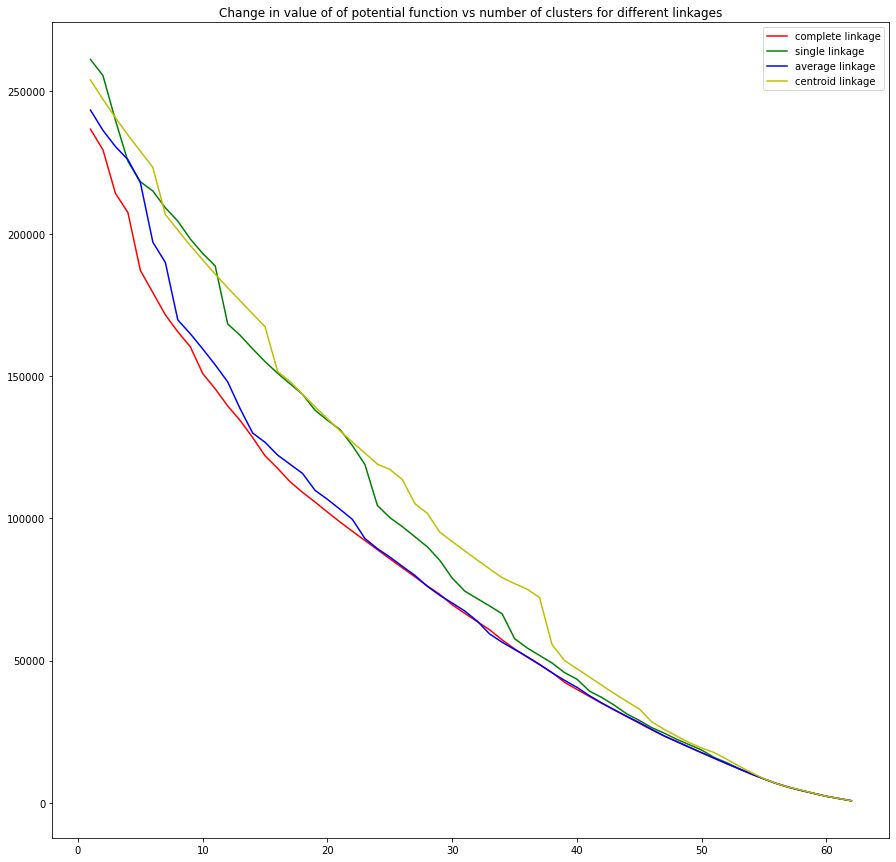

In [16]:
#Plotting change of potential function value vs number of clusters for different linkages
import matplotlib.pyplot as plt
complete = p[1:,0]
single = p[1:,1]
average = p[1:,2]
centroid = p[1:,3]
x = np.arange(1,63)
plt.figure(figsize=(15,15))
plt.plot(x, complete, "-r", label="complete linkage")
plt.plot(x,single, "-g", label="single linkage")
plt.plot(x, average, "-b", label="average linkage")
plt.plot(x,centroid, "-y", label="centroid linkage")
plt.title("Change in value of of potential function vs number of clusters for different linkages")
plt.legend()

In [15]:
print(p)

[[     0.              0.              0.              0.        ]
 [236735.86399257 261244.24782973 243453.90247935 254017.57723876]
 [229482.85682101 255565.67565108 236321.16416912 247244.43979529]
 [214201.7377691  239861.64504781 230643.93781759 240785.87557329]
 [207434.8676019  225466.44531135 226030.47094048 234709.73243226]
 [187083.84241577 218245.38555059 217932.27751866 228987.16342262]
 [179302.60315418 215017.24397089 197017.67306201 223328.66020245]
 [171508.58246982 209139.31976994 189922.45220785 206771.4597271 ]
 [165527.18338083 204421.71885935 169710.34604236 201285.19737914]
 [160291.30817734 198156.13647931 164856.65147334 195850.22748473]
 [150839.59620139 193035.66117975 159493.72979217 190791.15473362]
 [145479.43642776 188661.75265471 153906.78631131 185753.33552037]
 [139470.49823938 168285.6259368  147935.78853426 181010.68799343]
 [134349.1419045  164290.02203109 138484.0765583  176419.34193714]
 [128378.14412744 159530.18433113 129959.73482585 171845.83366